Homework 2: Machine Learning for Regression for Machine Learning Zoomcamp 2025

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

Preparing the dataset

Use only the following columns:

- 'engine_displacement',
- 'horsepower',
- 'vehicle_weight',
- 'model_year',
- 'fuel_efficiency_mpg'

In [1]:
import pandas as pd
import numpy as np

### EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

### Questions

#### Question 1
There's one column with missing values. What is it?

- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [5]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
df.horsepower.median()

np.float64(149.0)

In [7]:
df.dtypes.index

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [8]:
data = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year' ]]

In [9]:
data.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,170,159.0,3413.433759,2003
1,130,97.0,3149.664934,2007
2,170,78.0,3079.038997,2018
3,220,NaN,2542.392402,2009
4,210,140.0,3460.870990,2009


In [10]:
df.dtypes[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year' ]].index

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')

In [11]:
namacol = list(df.dtypes[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year' ]].index)
namacol

['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [12]:
# for col in namacol:
#     df[col] = df[col].str.lower().str.replace('-', '_')

In [13]:
len(data)

9704

In [14]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [16]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [17]:
idx = np.arange(n)

In [18]:
df.iloc[idx[:10]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412
7,150,4.0,239.0,3638.657780,17.3,2020,USA,Diesel,All-wheel drive,1.0,12.848884
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
9,150,4.0,123.0,3509.036569,10.2,2005,USA,Gasoline,Front-wheel drive,-1.0,12.298355


In [19]:
np.random.seed(42)
np.random.shuffle(idx)

In [20]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [21]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [22]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
1696,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5685,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
6735,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
2052,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [23]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [26]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [27]:
len(y_train)

5824

In [28]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [29]:
df_train.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors'],
      dtype='object')

In [30]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [31]:
X_train = df_train[base].values

In [32]:
y_train

array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
       2.94261017], shape=(5824,))

In [33]:
df_train[base].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [34]:
X_train = df_train[base].fillna(0).values

In [35]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

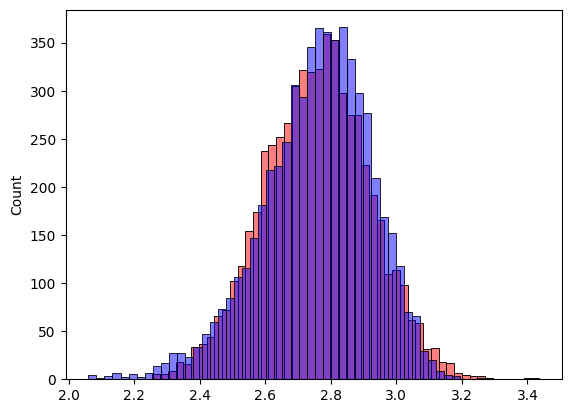

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [37]:
df_train[base].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [38]:
fillmean = df_train[base]['horsepower'].mean()
fillmean

np.float64(149.54476367006487)

In [39]:
X_train_mean = df_train[base].fillna(fillmean).values

In [40]:
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0 + X_train_mean.dot(w)

<Axes: ylabel='Count'>

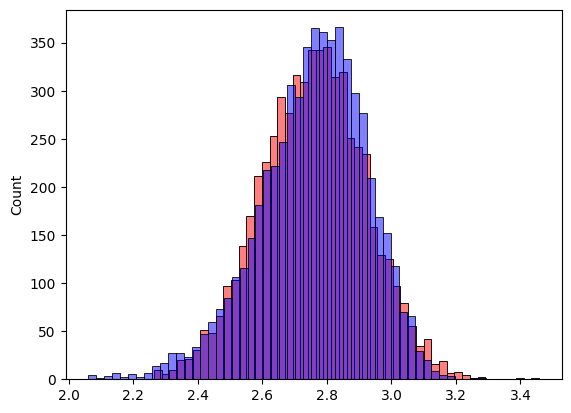

In [41]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [42]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

X_train = df_train[base].fillna(0).values
X_val = df_val[base].fillna(0).values

# w0, w = train_linear_regression(X_train, y_train)
# y_pred = w0 + X_train.dot(w)

In [43]:
df_val[base].isnull().sum()

engine_displacement      0
horsepower             136
vehicle_weight           0
model_year               0
dtype: int64

In [44]:
def rmse(y, y_pred):
    se =  (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [45]:
w0, w = train_linear_regression(X_train, y_train)


y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.04)

In [46]:
w0, w = train_linear_regression(X_train_mean, y_train)


y_pred_mean = w0 + X_val.dot(w)

rmse_train_mean = rmse(y_val, y_pred_mean)
rmse_train_mean.round(2)


np.float64(0.04)

In [47]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [48]:
#X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.0)

#X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.04)

In [49]:
#X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

#X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.04)

In [50]:
#X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

#X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.04)

In [51]:
#X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=1)

#X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.04)

In [52]:
#X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=5)

#X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.04)

In [53]:
#X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=10)

#X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.04)

In [54]:
#X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=100)

#X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.04)

In [55]:
rlist = [0, 0.01, 0.1, 1, 5, 10, 100]
Q3 = []

for c in rlist:
    result = []
    #X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=c)

    #X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    result = rmse(y_val, y_pred).round(2)

    Q3.append(result)
    

In [56]:
Q3

[np.float64(0.04),
 np.float64(0.04),
 np.float64(0.04),
 np.float64(0.04),
 np.float64(0.04),
 np.float64(0.04),
 np.float64(0.04)]

In [57]:
n = len(data)
idx = np.arange(n)
Q5 = []
seedlist = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for s in seedlist:
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    # del df_train['fuel_efficiency_mpg']
    # del df_val['fuel_efficiency_mpg']
    # del df_test['fuel_efficiency_mpg']

    base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

    X_train = df_train[base].fillna(0).values
    X_val = df_val[base].fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)
    
    y_pred = w0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    Q5.append(result)

std = np.std(Q5)
round(std, 3)

np.float64(0.001)

### Question 6

    1. Split the dataset like previously, use seed 9.
    2. Combine train and validation datasets.
    3. Fill the missing values with 0 and train a model with r=0.001.
    4. What's the RMSE on the test dataset?


In [64]:
import pandas as pd
import numpy as np

# --- Helper Functions ---

def train_linear_regression_reg(X, y, r=0.001):
    """
    Trains a regularized linear regression model using the normal equation.
    
    Args:
        X (np.ndarray): Feature matrix with a bias term.
        y (np.ndarray): Target vector.
        r (float): Regularization parameter.
        
    Returns:
        np.ndarray: Weight vector (including bias term).
    """
    # Add the bias term (a column of ones) to the feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Normal equation with regularization
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# def rmse(y, y_pred):
#     """
#     Calculates the Root Mean Squared Error.
    
#     Args:
#         y (np.ndarray): True target values.
#         y_pred (np.ndarray): Predicted values.
        
#     Returns:
#         float: The RMSE score.
#     """
#     error = y - y_pred
#     mse = (error ** 2).mean()
#     return np.sqrt(mse)

def rmse(y, y_pred):
    se =  (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [59]:
# --- Main Script ---

# For demonstration, we'll create a sample DataFrame.
# Replace this with your actual data loading, e.g., df = pd.read_csv('your_data.csv')
# data = {
#     'feature1': np.random.rand(200) * 150,
#     'feature2': np.append(np.random.rand(180) * 70, np.repeat(np.nan, 20)), # Introduce NaNs
#     'feature3': np.random.rand(200) * 50,
#     'fuel_efficiency_mpg': np.random.rand(200) * 500000 + 50000
# }
# df = pd.DataFrame(data)

# It's common practice to log-transform the fuel_efficiency_mpg to handle skewness
# df['fuel_efficiency_mpg'] = np.log1p(df['fuel_efficiency_mpg'])

# 1. Split the dataset with seed 9
# print("1. Splitting the dataset...")
# np.random.seed(9)



# df_train = df_shuffled.iloc[:n_train].copy()
# df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
# df_test = df_shuffled.iloc[n_train+n_val:].copy()

# y_train = df_train.fuel_efficiency_mpg.values
# y_val = df_val.fuel_efficiency_mpg.values
# y_test = df_test.fuel_efficiency_mpg.values

# del df_train['fuel_efficiency_mpg']
# del df_val['fuel_efficiency_mpg']
# del df_test['fuel_efficiency_mpg']

# print(f"   Train size: {len(df_train)}, Val size: {len(df_val)}, Test size: {len(df_test)}")

# # 2. Combine train and validation datasets
# print("\n2. Combining train and validation sets...")
# df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
# y_full_train = np.concatenate([y_train, y_val])
# print(f"   Full training set size: {len(df_full_train)}")

# # 3. Fill missing values and train the model
# print("\n3. Training model with r=0.001...")
# # Fill missing values with 0
# X_full_train = df_full_train.fillna(0).values

# # Train the model
# w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
# print(f"   Model training complete. Bias (w0): {w0:.4f}")

# # 4. Calculate RMSE on the test dataset
# print("\n4. Evaluating on the test dataset...")
# # Prepare the test set (fill NaNs with 0)
# X_test = df_test.fillna(0).values

# # Make predictions
# y_pred = w0 + X_test.dot(w)

# # Calculate RMSE
# score = rmse(y_test, y_pred)

# print(f"\n✅ Final RMSE on the test dataset: {score:.4f}")

In [65]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)


df_shuffled = df.iloc[idx]

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

print(f"   Train size: {len(df_train)}, Val size: {len(df_val)}, Test size: {len(df_test)}")

# 2. Combine train and validation datasets
print("\n2. Combining train and validation sets...")
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])
print(f"   Full training set size: {len(df_full_train)}")


# base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# X_train = df_train[base].fillna(0).values
# X_val = df_val[base].fillna(0).values

# w0, w = train_linear_regression(X_train, y_train)

# y_pred = w0 + X_val.dot(w)

# result = rmse(y_val, y_pred)

   Train size: 5824, Val size: 1940, Test size: 1940

2. Combining train and validation sets...
   Full training set size: 7764


In [66]:
# 3. Fill missing values and train the model
print("\n3. Training model with r=0.001...")
# Fill missing values with 0
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
# y_full_train = y_full_train[base]
X_full_train = df_full_train[base].fillna(0).values

# Train the model
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
print(f"   Model training complete. Bias (w0): {w0:.4f}")


3. Training model with r=0.001...
   Model training complete. Bias (w0): 3.5303


In [63]:
# 4. Calculate RMSE on the test dataset
print("\n4. Evaluating on the test dataset...")
# Prepare the test set (fill NaNs with 0)
X_test = df_test[base].fillna(0).values

# Make predictions
y_pred = w0 + X_test.dot(w)

# Calculate RMSE
score = rmse(y_test, y_pred)

print(f"\n✅ Final RMSE on the test dataset: {score:.4f}")


4. Evaluating on the test dataset...

✅ Final RMSE on the test dataset: 0.0392


In [67]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])